In [2]:
from initial_dataset import InitialDataset
from verstack import LGBMTuner
import h5py
import pandas as pd
import numpy as np
from dataset import ParticleDataset

2023-05-08 21:29:01.336394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 21:29:03.017214: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-08 21:29:03.017385: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-08 21:29:03.017407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
# Maybe old code.
# def _load_data(name):
#     file_extension_length = len(".h5")
#     with h5py.File(f'{name}', 'r') as f:
#         filename = name.split('/')[-1][:-file_extension_length]
#         return pd.DataFrame(f[filename][:], dtype=np.float32)
#
# path="../data/initial/train.h5"
# variables_path="../data/initial/variables.txt"
# label_name='Truth'
#
# all_data = _load_data(path)
# with open(variables_path, 'r') as file:
#     variables = file.read()
# variables = variables.replace("'", "")
# variables = variables.replace(" ", "")
# variables = variables.replace("\n", "")
# variables = variables.split(",")
# features = all_data[variables]
# labels = all_data[label_name]
#
# print(features.head())
# print(labels.head())

   actualInteractionsPerCrossing  averageInteractionsPerCrossing   
0                          26.50                           26.50  \
1                          35.50                           35.50   
2                          29.49                           29.49   
3                          37.50                           37.50   
4                          59.50                           59.50   

   correctedActualMu  correctedAverageMu  correctedScaledActualMu   
0              26.50               26.50                    26.50  \
1              35.50               35.50                    35.50   
2              29.49               29.49                    29.49   
3              37.50               37.50                    37.50   
4              59.50               59.50                    59.50   

   correctedScaledAverageMu  NvtxReco  p_nTracks    p_pt_track     p_eta  ...   
0                     26.50      18.0        3.0  42011.792969  1.834715  ...  \
1             

In [5]:
data = ParticleDataset(variables_path="/home/amh/Documents/coding/GitHub/AppliedML2023/data/initial/variables.txt")
train, val = data.split_data(0.8, seed=42)
features, labels = train[:]
features = features.numpy()
labels = labels.numpy()
features = pd.DataFrame(features, columns=data.variables)
labels = pd.Series(labels)

print(features.head())

   actualInteractionsPerCrossing  averageInteractionsPerCrossing   
0                      -0.748017                       -0.748017  \
1                      -0.442471                       -0.442471   
2                      -0.671630                       -0.671630   
3                      -0.060538                       -0.060538   
4                      -1.436260                       -1.436260   

   correctedActualMu  correctedAverageMu  correctedScaledActualMu   
0          -0.748017           -0.748017                -0.748017  \
1          -0.442471           -0.442471                -0.442471   
2          -0.671630           -0.671630                -0.671630   
3          -0.060538           -0.060538                -0.060538   
4          -1.436260           -1.436260                -1.436260   

   correctedScaledAverageMu  NvtxReco  p_nTracks  p_pt_track     p_eta  ...   
0                 -0.748017 -0.600583   1.970399   -0.034098 -0.902359  ...  \
1                 


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: accuracy 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.137814300042075
     .. Evaluation score (greater-better): accuracy: 0.946123076923077
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.13892732350927858
     .. Evaluation score (greater-better): accuracy: 0.9456923076923077
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.13500920696498842
     .. Evaluation score (greater-better): accuracy: 0.946123076923077
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.14

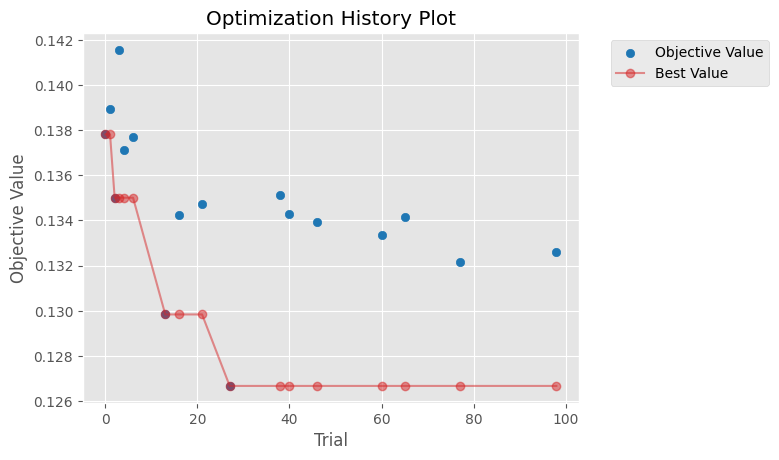

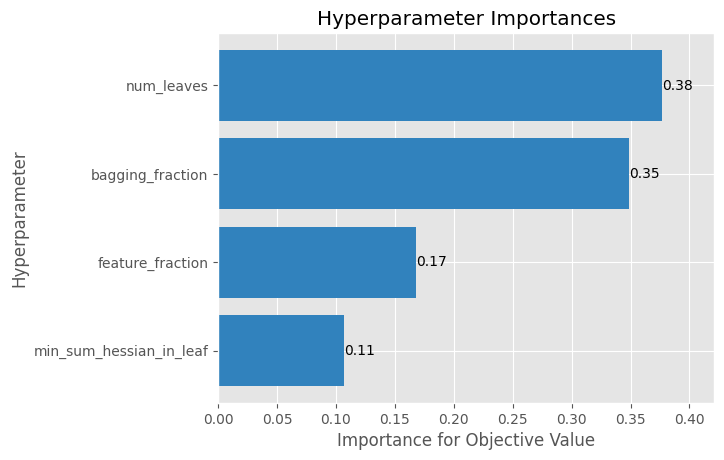

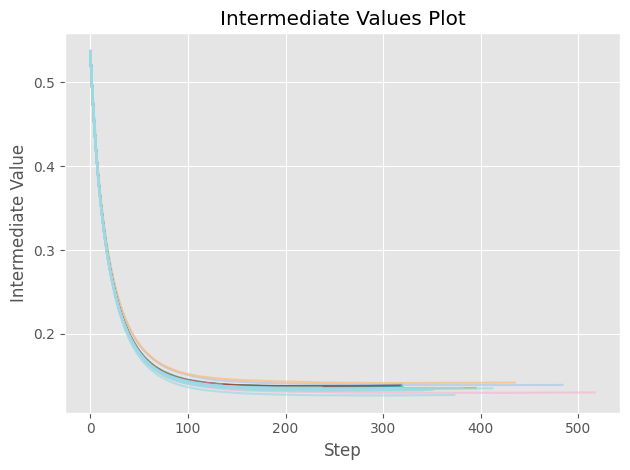

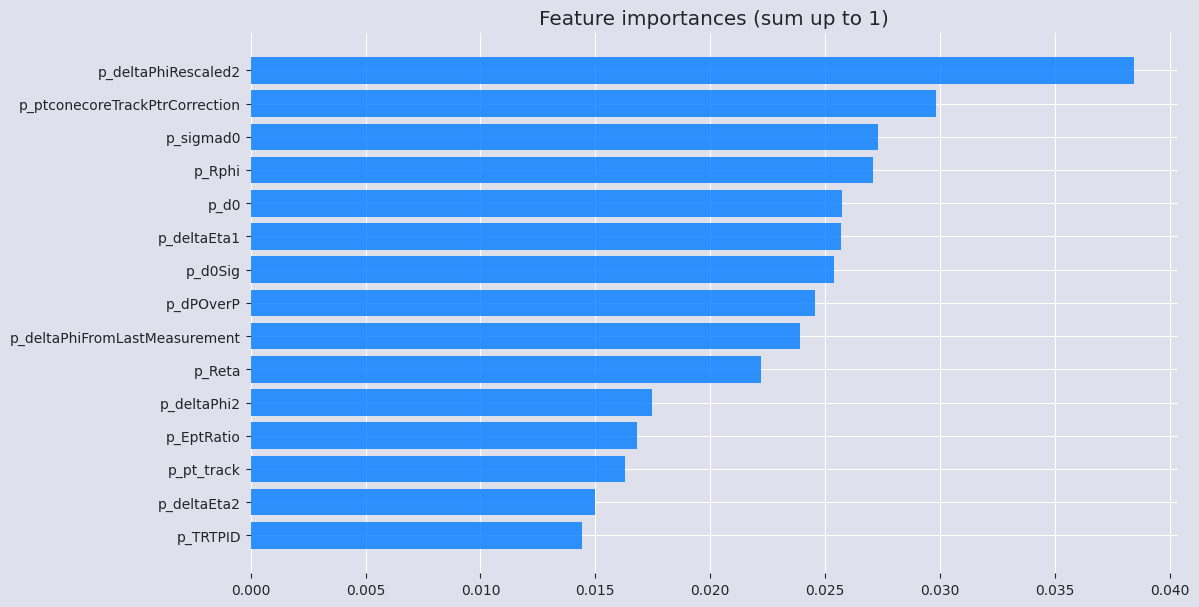


     . Optuna hyperparameters optimization finished
     .. Best trial number:27    |     log_loss:          0.12667345232225746
 ---------------------------------------------------------------------------
     . num_iterations optimization finished
     .. best iteration:  218   |     accuracy:           0.9492615384615385

Time elapsed for fit execution: 29 min 23.52 sec


In [6]:
tuner = LGBMTuner(metric="accuracy",
                  device_type="cpu")
tuner.fit(features, labels)

In [7]:
feature_importance_list = [(tuner.feature_importances[i], features.columns[i]) for i in range(len(features.columns))]
top_features = [tup[1] for tup in sorted(feature_importance_list)[::-1]]
print(top_features[:15])

['p_deltaPhiRescaled2', 'p_ptconecoreTrackPtrCorrection', 'p_sigmad0', 'p_Rphi', 'p_d0', 'p_deltaEta1', 'p_d0Sig', 'p_dPOverP', 'p_deltaPhiFromLastMeasurement', 'p_Reta', 'p_deltaPhi2', 'p_EptRatio', 'p_pt_track', 'p_deltaEta2', 'p_TRTPID']



 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: accuracy 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.1393069857440821
     .. Evaluation score (greater-better): accuracy: 0.9452307692307692
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.13815213724749406
     .. Evaluation score (greater-better): accuracy: 0.9454461538461538
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.1379794093123776
     .. Evaluation score (greater-better): accuracy: 0.9454769230769231
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.

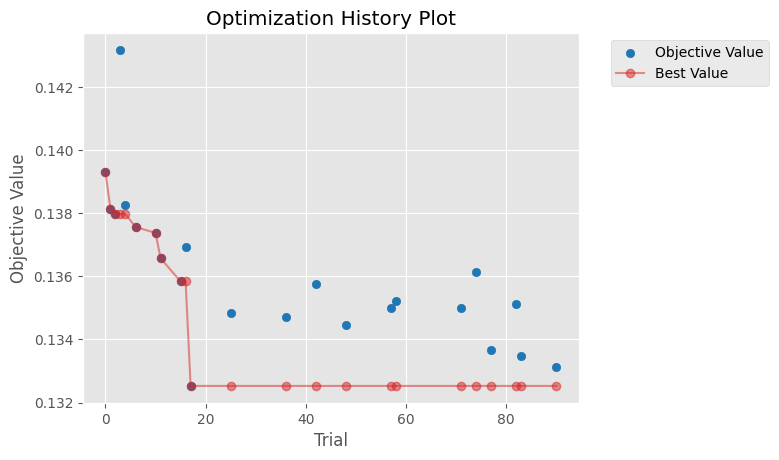

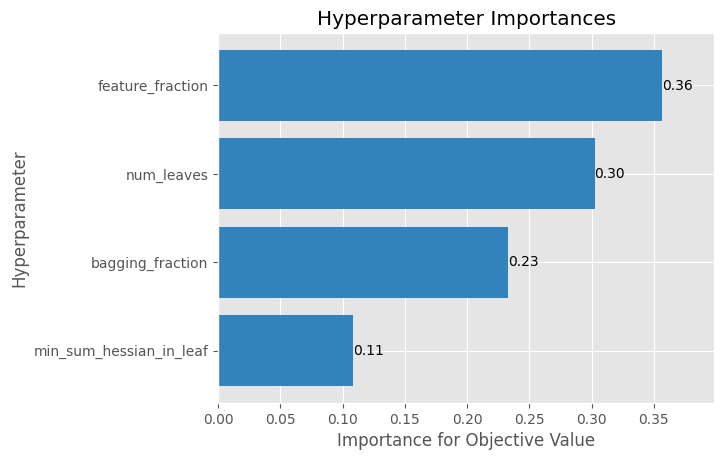

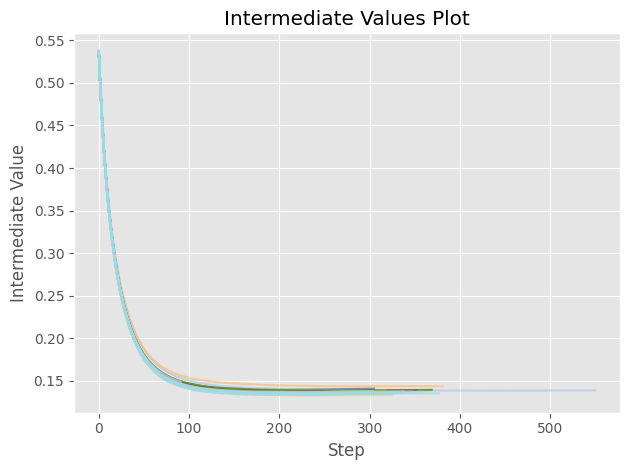

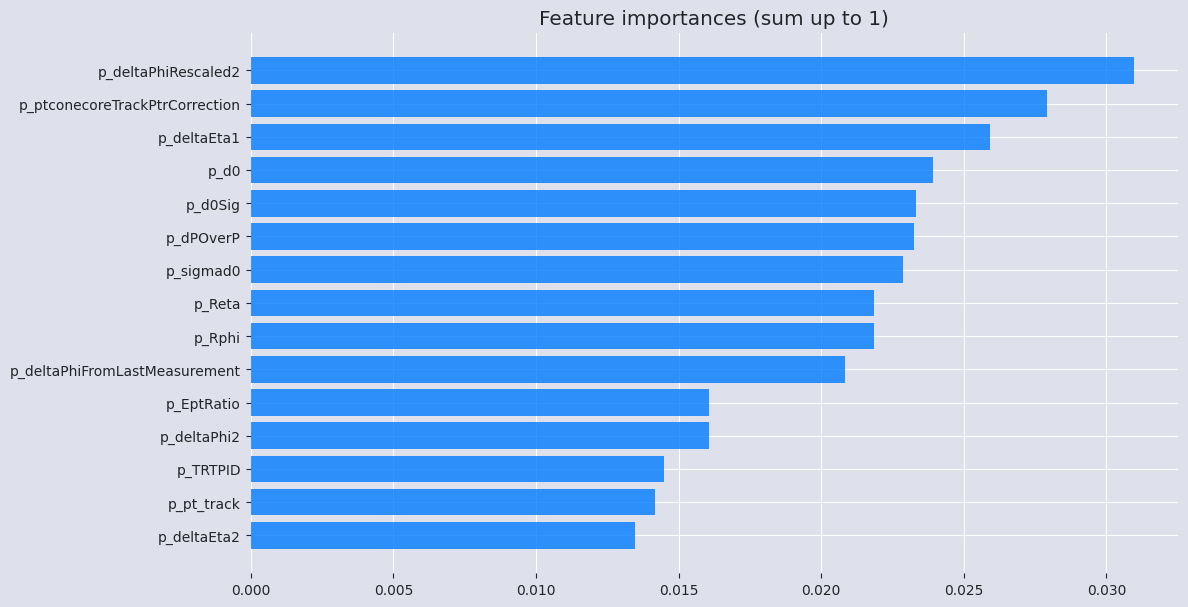


     . Optuna hyperparameters optimization finished
     .. Best trial number:17    |     log_loss:          0.13252627083725865
 ---------------------------------------------------------------------------
     . num_iterations optimization finished
     .. best iteration:  313   |     accuracy:           0.9452923076923077

Time elapsed for fit execution: 24 min 31.96 sec


In [8]:
features_reduced = features[top_features]
tuner_reduced = LGBMTuner(metric="accuracy")
tuner_reduced.fit(features_reduced, labels)

In [9]:
import pickle


with open("/home/amh/Documents/coding/GitHub/AppliedML2023/data/initial/lgbm_tuner.pickle", "wb") as handle:
    pickle.dump(tuner_reduced, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("done")

done
